# Feature engineering part 2
## Principal Component Analysis

---



---


###<font color =  green> By  Vipul Arora
###<font color =  green> April 4 2023

References

> (https://datasciencesamurai.com/step-by-step-principal-component-analysis-pca-python/)

> (http://3.230.252.179/MAT616F21/uploads/M616/PCA_paper-h.pdf) "Principal component analysis: a review and recent developments" 

> (https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

## Assignment: 1. Fill in the missing code and add comments to the provided code below using the notation from the paper "Principal component analysis: a review and recent developments" part 2(a) (the part highlighted in yellow).



In [ ]:
# This is another way to download the iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
colors = ["blue", "red", "green"]
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], 
    columns=['sepal length','sepal width','petal length','petal width','target']
)

In [ ]:
# Take a look at the data set
# YOUR CODE HERE
#Exploring the data frame : 
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


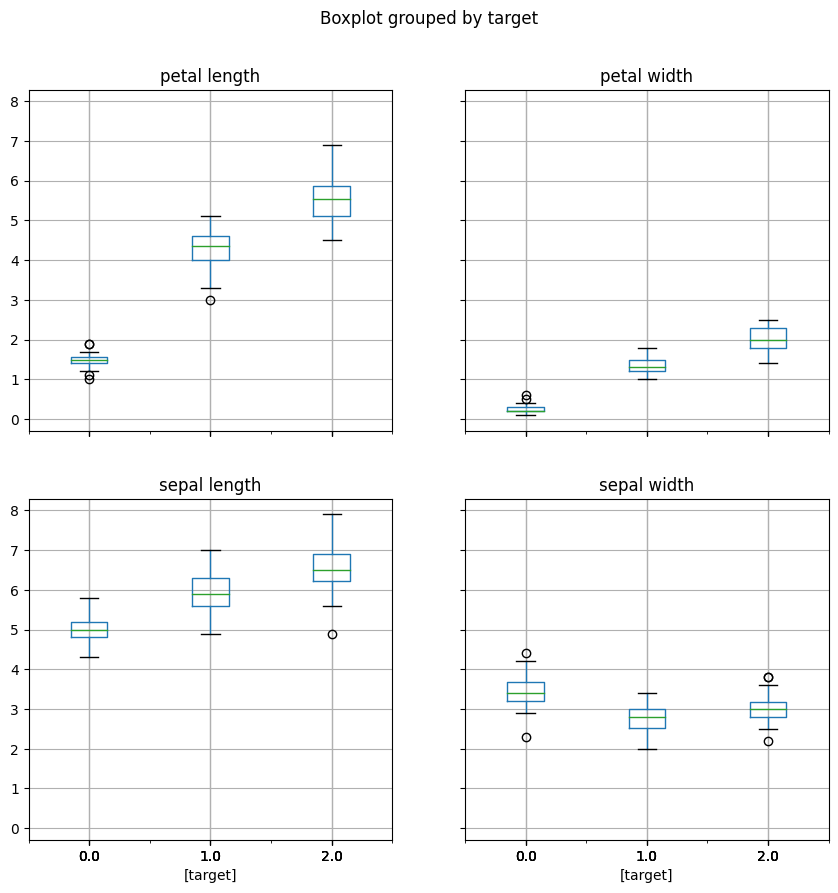

In [ ]:
# Explore the values in each feature. 
# Look at the graph generated
# below and write an explanation of what it means.
df.boxplot(by="target", layout=(2, 2), figsize=(10, 10));

 YOUR EXPLANATION HERE: 

<font color = green>Features are grouped by targets therefore the boxplot shows distribution of average length of each features by target

Data that has different ranges benefits from rescaling using standard deviation as the common unit. Here it is necessary to standardize the dataset as follows: $$ x_s = \frac{x - \mu}{\sigma}$$

The new set of $x_s$ values denotes how far from the mean each value is in standard deviation units.

In [ ]:
# The new dataframe X1 standardizes the original one
X = (df-df.mean())/df.std()
X.iloc[:,:4].head()

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [ ]:
# Explain by explicitly showing how the entry in the (0,0) 
# position (-0.897674) was computed.
# YOUR CODE HERE
# Compute the value at position (0,0) of the normalized DataFrame
value = (X.iloc[0, 0])

# Print the value
print(value)

-0.8976738791967671


In [ ]:
# You can also  use sklearn to get the same result
# X is the new set of standardized values
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(df.iloc[:,:4])
X1[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Are the values from sklearn and the one from scratch the same?

YOUR EXPLANATION HERE

<font color = green> So the Output in both is almost similar howere there is minor diffrence it is due to the floating-point precision limitations beacuse this is how computers deal with real numbers, However, both values are very close to each other and would not significantly affect the analysis.

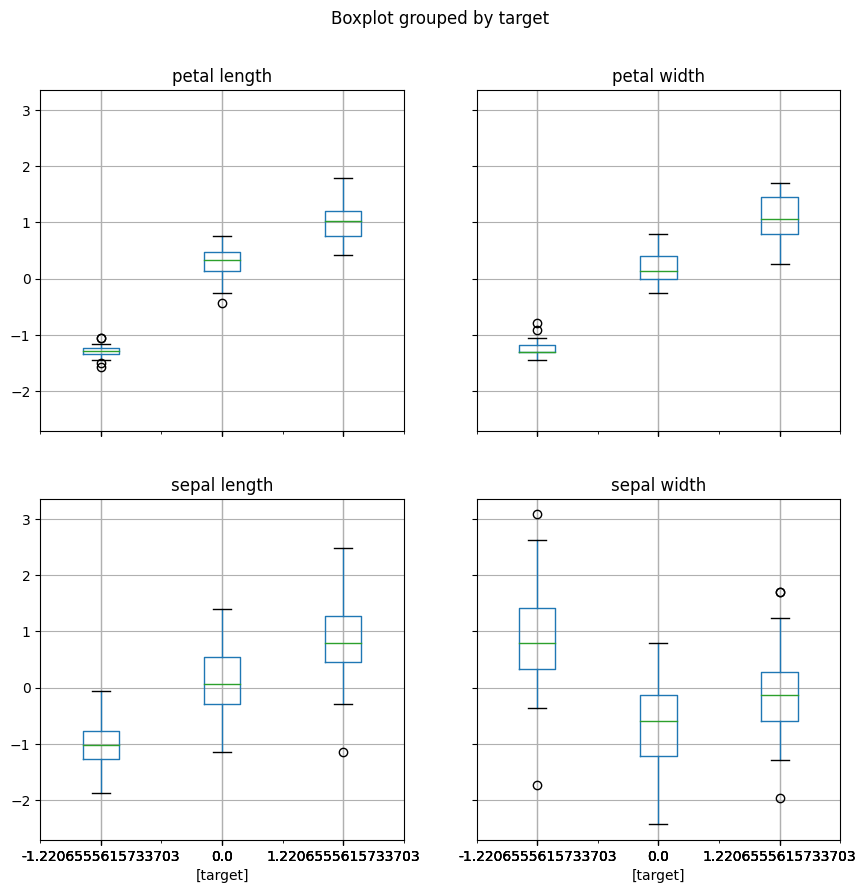

In [ ]:
# Explore the values in each feature
X.boxplot(by="target", layout=(2, 2), figsize=(10, 10));

How are this boxplots different that the previous ones?

YOUR EXPLANATION HERE

<font color = green>Here boxplot is much improved than previous one with new standardized value

In [ ]:
# Compute the covariance matrix
# NOTE: @ is matrix multiplication, 
# exactly the same as using np.dot()
X4=X.iloc[:,:4]
cov = (X4.T @ X4) / (X4.shape[0] - 1)

In [ ]:
# Show the covariant matrix below
# YOUR CODE HERE
#covariant matrix
cov

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
np.cov(X4.T) # Here we find the covarian matrix using Numpy

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Next, we compute the eigenvalues and eigenvectors of the Covariance matrix.

In [ ]:
# Compute the eigenvectors and eigenvalues
eig_values, eig_vectors = np.linalg.eig(cov)

In [ ]:
# Here are is the list of eigenvalues and eigenvectors
(eig_values,eig_vectors)

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Test the values you got from the definition of eigenvectors and eigenvalues:
$$cov.x=\lambda * x$$

NOTE: The eigenvectors are the columns (not the rows) of eig_vectors

In [ ]:
# YOUR CODE HERE
eig_values[0]*eig_vectors.T[0]

array([ 1.52072973, -0.78608992,  1.69393435,  1.64853257])

In [ ]:
# matrix . x
# Note that we need to transpose the matrix eig_vectors
# because the columns are the eigenvectors
# YOUR CODE HERE
np.dot (cov,eig_vectors.T[0])

array([ 1.52072973, -0.78608992,  1.69393435,  1.64853257])

Sort the eigenvectors list by the value of the corresponding eigenvalues

In [ ]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

In [ ]:
sorted_eig_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
eig_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

Now create the new data set (called scores) of rotated points. Each feature X became Xa, with variance equal to the corresponding eigenvalue.


USE ONLY THE FIRST TWO PRINCIPAL COMPONENTS

In [ ]:
# the two selected eigon vectors are :
sorted_eig_vectors[:, :2]

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
#calculating the scores by multiplying X and a
eig_scores = np.dot(X4, sorted_eig_vectors[:, :2])

In [ ]:
# Show the values of the eigen scores
# YOUR CODE HERE
#Values of the eigen scores
eig_scores

array([[-2.25714118, -0.47842383],
       [-2.07401302,  0.67188269],
       [-2.35633511,  0.34076642],
       [-2.29170679,  0.59539986],
       [-2.3818627 , -0.64467566],
       [-2.06870061, -1.4842053 ],
       [-2.43586845, -0.04748512],
       [-2.22539189, -0.222403  ],
       [-2.32684533,  1.1116037 ],
       [-2.17703491,  0.46744757],
       [-2.15907699, -1.04020587],
       [-2.31836413, -0.132634  ],
       [-2.2110437 ,  0.72624318],
       [-2.62430902,  0.95829635],
       [-2.19139921, -1.85384655],
       [-2.25466121, -2.67731523],
       [-2.20021676, -1.47865573],
       [-2.18303613, -0.48720613],
       [-1.89223284, -1.40032757],
       [-2.33554476, -1.1240836 ],
       [-1.90793125, -0.40749058],
       [-2.19964383, -0.92103587],
       [-2.76508142, -0.4568133 ],
       [-1.81259716, -0.08527285],
       [-2.21972701, -0.13679618],
       [-1.9453293 ,  0.62352971],
       [-2.04430277, -0.24135499],
       [-2.1613365 , -0.52538942],
       [-2.13241965,

Check what percentage of the variability is "explained" by each eigenvalue in decreasing order using this formula: $$\lambda_i\mbox{ proportion of total var}=\frac{\lambda_i}{\Sigma_{j=1}^k\lambda_j}$$

<ipython-input-21-7d4fc69a3aa8>:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1);


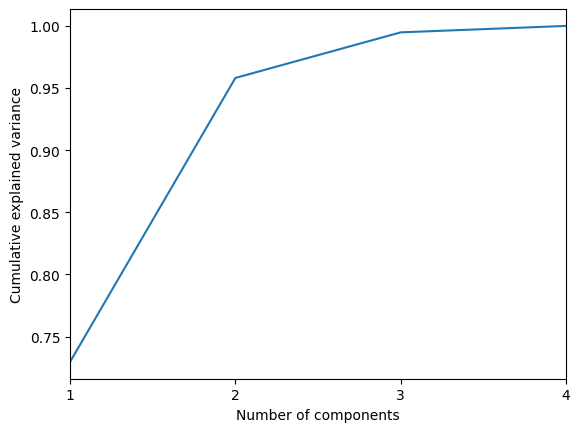

In [ ]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1);

What is the percentage of variance explained by the sum of 1, 2, 3, or 4 eigenvalues?

YOUR ANSWER HERE

<font color = green> 95 % Variance is due to the first two values and last two values contributes to ony 5 % of Variance.

Finally, graph the data in as few dimensions as needed still keeping as much information as possible. In this case, keeping just 2 dimensions keeps 95% of the variance.

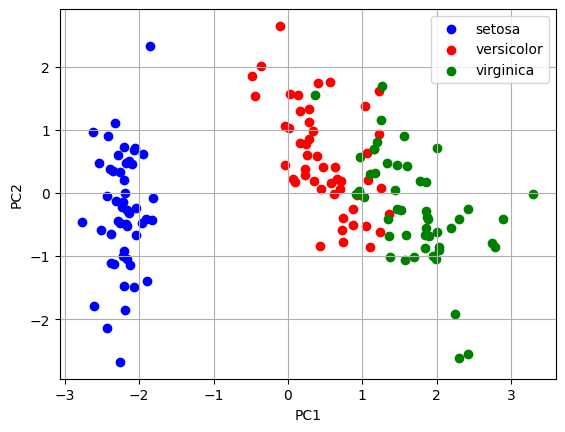

In [ ]:
def biplot2(score):
    xs = score[:, 0]
    ys = score[:, 1]

    for i, u in enumerate(iris["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == i
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == i
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot2(eig_scores)
plt.legend();

We can keep the 4-D axes in the graph to show more detail of what we have done.

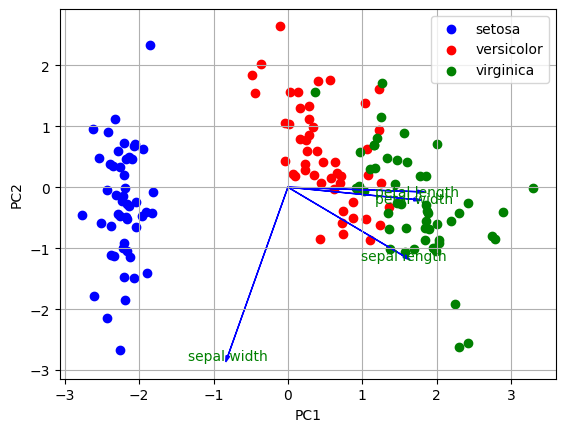

In [ ]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(iris["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == i
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == i
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, 3*coeff[i, 0], 3*coeff[i, 1], color="b", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 3,
            coeff[i, 1] * 3,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(eig_scores, sorted_eig_vectors, ['sepal length','sepal width','petal length','petal width'])
plt.legend();

All that we have done above can also be done using sklearn 

In [ ]:
# Tutorial on StandardScaler 
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal length','petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# Create the scores (new rotated sample points)
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

Compare the result from both methods (1. from scratch and 2. using sklearn)

In [ ]:
eig_scores[:5]

array([[-2.25714118, -0.47842383],
       [-2.07401302,  0.67188269],
       [-2.35633511,  0.34076642],
       [-2.29170679,  0.59539986],
       [-2.3818627 , -0.64467566]])

In [ ]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


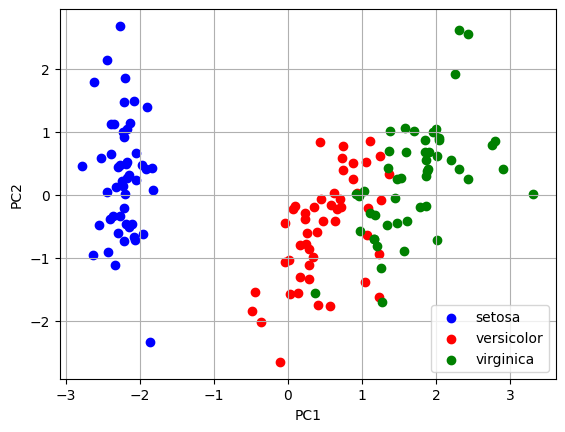

In [ ]:
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot2(principalDf.iloc[:,:2].values)
plt.legend();

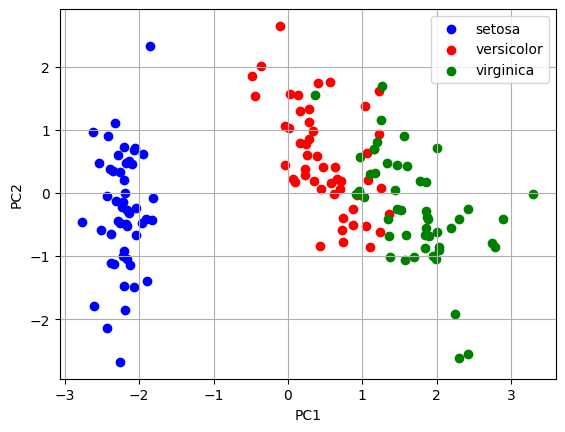

In [ ]:
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot2(eig_scores)
plt.legend();

## Assignment: 2. Create a K-cluster model for the data in the first two principal components of the iris data set.

###<font color = green> Assignment 2 : Begains 

In [ ]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


<font color = green> Applying k-mean clustering simmilar to the midterm.

In [ ]:
# defining the principle component scores to the data frame
df=principalDf
df_features=df.iloc[:,:2]

In [ ]:
#Create three random points (called centroids). In this model, k=3 for obvious reasons.
def create_cent(x):
  return [df_features.iloc[i,:] for i in x]
  
centroids=create_cent([1,60,120])

centroids

[principal component 1   -2.080961
 principal component 2   -0.674134
 Name: 1, dtype: float64,
 principal component 1   -0.110196
 principal component 2   -2.654073
 Name: 60, dtype: float64,
 principal component 1    2.037716
 principal component 2    0.910467
 Name: 120, dtype: float64]

In [ ]:
 #Classify each of the observations in df_features based on its distance to the centroids.

import math

def team_of(v):
  return np.argmin([math.dist(v,c) for c in centroids])

def update_labels():
    df['Centroid']=df_features.apply(team_of,axis=1)
update_labels()

In [ ]:
#Update each centroid value as the average of points closest to it.
def update_cent():
  return [df.groupby('Centroid').get_group(i).iloc[:,:2].mean(axis=0) for i in [0,1,2]]
update_cent()

[principal component 1   -2.096416
 principal component 2    0.256730
 dtype: float64,
 principal component 1    0.301938
 principal component 2   -1.358728
 dtype: float64,
 principal component 1    1.422788
 principal component 2    0.260312
 dtype: float64]

In [ ]:
#Run this updating process enough times until the values stops changing.

# First: Create centroids by selecting three points from the dataset
centroids=create_cent([1,50,140])

#c_dist is distance between centroids and centroids_new
c_dist=1
#count will count the number of iterations
count=0
#this is the loop to find the best centroids
while np.linalg.norm(c_dist)>.01:
  #create the centroid-labels for points
  update_labels()
  #next update the centroids as the average of members in the group
  centroids_new=update_cent()
  #find the distance between the old and new centroids
  c_dist=[math.dist(centroids[i],centroids_new[i]) for i in [0,1,2]]
  #rename the centroids and the new ones.
  centroids=centroids_new
  count+=1
print(count," iterations done to obtain the final centroids:")
pd.DataFrame(centroids)

8  iterations done to obtain the final centroids:


,principal component 1,principal component 2
0,-2.224753,0.288927
1,0.617424,-0.798458
2,1.717319,0.654863


In [ ]:
acc=1- sum(abs([50,50,50]-df.groupby('Centroid').count().iloc[:,0].values))/150

In [ ]:
print(acc, "accuracy")

0.9333333333333333 accuracy


## Assignment: 3. Compare the accuracy to K-cluster in 4 dimensions, in 2 dimensions using the least correlated features and in 2 dimensions using the largest principal components.

###<font color = green> Assignment 3 : Begains 

In [ ]:
#deining the data for applying the k clustering on 4 dimensions
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
#Exploring the data and detrmining that it has all the correct values 
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Applying k clustering to detmine the accuracy of 4 dimensions data 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=50)
kmeans.fit(data)
labels = kmeans.predict(data)

In [ ]:
# calculating accuracy for 4 dimensions iris data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(iris.target, labels)
print("Accuracy in 4 dimensions:", accuracy)

Accuracy in 4 dimensions: 0.8933333333333333


In [ ]:
#findidng the correlation of each variable
corr_matrix = data.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
#Preparing 2 dimention data set for least correlated data variables
#applying  k-mean on that data 
least = data[['sepal length (cm)', 'sepal width (cm)']]
kmeans = KMeans(n_clusters=3, n_init=50)
kmeans.fit(least)
labels = kmeans.predict(least)

In [ ]:
#Calcluting the accuracy for 2 dimention data set for least correlated
acc_2 = accuracy_score(iris.target, labels)
print("Accuracy in 2 dimensions: ", acc_2)

Accuracy in 2 dimensions:  0.5133333333333333


In [ ]:
# Print the accuracies
print("Accuracy of K-means clustering on the original iris dataset with 4 variables:",format(accuracy*100))

print("Accuracy of K-means clustering on 2 dimensions using the least correlated features:",format(acc_2*100))

print("Accuracy of K-means clustering on  2 dimensions using the largest principal components:",format(acc*100))

Accuracy of K-means clustering on the original iris dataset with 4 variables: 89.33333333333333
Accuracy of K-means clustering on 2 dimensions using the least correlated features: 51.33333333333333
Accuracy of K-means clustering on  2 dimensions using the largest principal components: 93.33333333333333
